In [ ]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=2ac054b93393330f2a94d949cb09a4f17b8b32e3121956be6dad7ac3a5ea415e
  Stored in directory: /root/.cache/pip/wheels/a8/03/64/8557323821d25118c3a2dc1646996f7a962a8970d4b7d22473
Successfully built autograd-gamma


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.impute import SimpleImputer
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test, pairwise_logrank_test
from scipy import stats
from itertools import product
%matplotlib inline

In [ ]:
df_patient = pd.read_table('data_clinical_patient.txt', sep='\t')
df_patient.head()

,#Identifier to uniquely specify a patient.,Subtype,Text field to hold cancer type acronym used by TCGA PanCanAtlas.,Legacy DMP patient identifier (DMPnnnn),Age at which a condition or disease was first diagnosed.,Sex,"The extent of a cancer, especially whether the disease has spread from the original site to other parts of the body based on AJCC staging criteria.","The version or edition of the American Joint Committee on Cancer Cancer Staging Handbooks, a publication by the group formed for the purpose of developing a system of clinical staging for cancer that is acceptable to the American medical profession and is compatible with other accepted classifications.","Time interval from the date of last followup to the date of initial pathologic diagnosis, represented as a calculated number of days..","Time interval from a person's date of birth to the date of initial pathologic diagnosis, represented as a calculated number of days.",...,Weight measured in kilograms.,Patient Part of PanCan Pathway Analysis,Overall patient survival status.,Overall survival in months since initial diagonosis.,The time period usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.,The time period (months) usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.,Disease free status since initial treatment.,Disease free (months) since initial treatment.,Progression Free Status,Progress Free Survival (Months)
0,#STRING,STRING,STRING,STRING,NUMBER,STRING,STRING,STRING,NUMBER,NUMBER,...,NUMBER,STRING,STRING,NUMBER,STRING,NUMBER,STRING,NUMBER,STRING,NUMBER
1,#1,1,1,1,1,1,1,1,1,1,...,1,1,9,1,1,1,1,1,1,1
2,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,WEIGHT,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
3,TCGA-05-4244,LUAD,LUAD,34040b83-7e8a-4264-a551-b16621843e28,70,Male,STAGE IV,6TH,0,-25752,...,NaN,Yes,0:LIVING,0,0:ALIVE OR DEAD TUMOR FREE,0,NaN,NaN,0:CENSORED,0
4,TCGA-05-4249,LUAD,LUAD,4addf05f-3668-4b3f-a17f-c0227329ca52,67,Male,STAGE IB,6TH,1523,-24532,...,NaN,Yes,0:LIVING,50.07068416,0:ALIVE OR DEAD TUMOR FREE,50.07068416,NaN,NaN,0:CENSORED,50.07068416


In [ ]:
df_patient = df_patient.drop(index=[0,1,2])
df_patient.head()

,#Identifier to uniquely specify a patient.,Subtype,Text field to hold cancer type acronym used by TCGA PanCanAtlas.,Legacy DMP patient identifier (DMPnnnn),Age at which a condition or disease was first diagnosed.,Sex,"The extent of a cancer, especially whether the disease has spread from the original site to other parts of the body based on AJCC staging criteria.","The version or edition of the American Joint Committee on Cancer Cancer Staging Handbooks, a publication by the group formed for the purpose of developing a system of clinical staging for cancer that is acceptable to the American medical profession and is compatible with other accepted classifications.","Time interval from the date of last followup to the date of initial pathologic diagnosis, represented as a calculated number of days..","Time interval from a person's date of birth to the date of initial pathologic diagnosis, represented as a calculated number of days.",...,Weight measured in kilograms.,Patient Part of PanCan Pathway Analysis,Overall patient survival status.,Overall survival in months since initial diagonosis.,The time period usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.,The time period (months) usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.,Disease free status since initial treatment.,Disease free (months) since initial treatment.,Progression Free Status,Progress Free Survival (Months)
3,TCGA-05-4244,LUAD,LUAD,34040b83-7e8a-4264-a551-b16621843e28,70,Male,STAGE IV,6TH,0,-25752,...,NaN,Yes,0:LIVING,0,0:ALIVE OR DEAD TUMOR FREE,0,NaN,NaN,0:CENSORED,0
4,TCGA-05-4249,LUAD,LUAD,4addf05f-3668-4b3f-a17f-c0227329ca52,67,Male,STAGE IB,6TH,1523,-24532,...,NaN,Yes,0:LIVING,50.07068416,0:ALIVE OR DEAD TUMOR FREE,50.07068416,NaN,NaN,0:CENSORED,50.07068416
5,TCGA-05-4250,LUAD,LUAD,f98ecd8a-b878-4f53-b911-20cd8e17281c,79,Female,STAGE IIIA,6TH,NaN,-29068,...,NaN,Yes,1:DECEASED,3.978038597,NaN,3.978038597,NaN,NaN,0:CENSORED,3.978038597
6,TCGA-05-4382,LUAD,LUAD,3434b91a-c05f-460f-a078-7b1bb6e7085d,68,Male,STAGE IB,6TH,607,-24868,...,NaN,Yes,0:LIVING,19.95594569,0:ALIVE OR DEAD TUMOR FREE,19.95594569,1:Recurred/Progressed,10.98070158,1:PROGRESSION,10.98070158
7,TCGA-05-4384,LUAD,LUAD,9a50e7e4-831d-489f-87d2-979e987561cc,66,Male,STAGE IIIA,6TH,426,-24411,...,NaN,Yes,0:LIVING,14.00532597,0:ALIVE OR DEAD TUMOR FREE,14.00532597,NaN,NaN,1:PROGRESSION,6.016372423


In [ ]:
df_patient.shape

(566, 37)

In [ ]:
df_patient.dtypes

#Identifier to uniquely specify a patient.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       object
Subtype                                                                                                                                                                                                                                                                                                                                                                                         

In [ ]:
df_patient.columns

Index(['#Identifier to uniquely specify a patient.', 'Subtype',
       'Text field to hold cancer type acronym used by TCGA PanCanAtlas.',
       'Legacy DMP patient identifier (DMPnnnn)',
       'Age at which a condition or disease was first diagnosed.', 'Sex',
       'The extent of a cancer, especially whether the disease has spread from the original site to other parts of the body based on AJCC staging criteria.',
       'The version or edition of the American Joint Committee on Cancer Cancer Staging Handbooks, a publication by the group formed for the purpose of developing a system of clinical staging for cancer that is acceptable to the American medical profession and is compatible with other accepted classifications.',
       'Time interval from the date of last followup to the date of initial pathologic diagnosis, represented as a calculated number of days..',
       'Time interval from a person's date of birth to the date of initial pathologic diagnosis, represented as a calcul

In [ ]:
unique_counts = df_patient.nunique()
unique_counts

#Identifier to uniquely specify a patient.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       566
Subtype                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
df_patient.describe()

,#Identifier to uniquely specify a patient.,Subtype,Text field to hold cancer type acronym used by TCGA PanCanAtlas.,Legacy DMP patient identifier (DMPnnnn),Age at which a condition or disease was first diagnosed.,Sex,"The extent of a cancer, especially whether the disease has spread from the original site to other parts of the body based on AJCC staging criteria.","The version or edition of the American Joint Committee on Cancer Cancer Staging Handbooks, a publication by the group formed for the purpose of developing a system of clinical staging for cancer that is acceptable to the American medical profession and is compatible with other accepted classifications.","Time interval from the date of last followup to the date of initial pathologic diagnosis, represented as a calculated number of days..","Time interval from a person's date of birth to the date of initial pathologic diagnosis, represented as a calculated number of days.",...,Weight measured in kilograms.,Patient Part of PanCan Pathway Analysis,Overall patient survival status.,Overall survival in months since initial diagonosis.,The time period usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.,The time period (months) usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.,Disease free status since initial treatment.,Disease free (months) since initial treatment.,Progression Free Status,Progress Free Survival (Months)
count,566,502,566,514,495,514,512,493,392,483,...,0,566,514,505,478,505,304,301,514,505
unique,566,1,1,514,52,2,9,5,331,474,...,0,2,2,432,2,432,2,270,2,422
top,TCGA-05-4244,LUAD,LUAD,34040b83-7e8a-4264-a551-b16621843e28,70,Female,STAGE IB,7TH,0,-25384,...,NaN,Yes,0:LIVING,0,0:ALIVE OR DEAD TUMOR FREE,0,0:DiseaseFree,16.9313213,0:CENSORED,0
freq,1,502,566,1,26,275,139,269,5,2,...,NaN,502,328,4,364,4,215,3,306,4


In [ ]:
# Drop columns with over 20% missing values
min_nona = round(566*0.8)
df_patient.dropna(axis=1, thresh=min_nona, inplace=True)

In [ ]:
df_patient.shape

(566, 28)

In [ ]:
df_patient.columns

Index(['#Identifier to uniquely specify a patient.', 'Subtype',
       'Text field to hold cancer type acronym used by TCGA PanCanAtlas.',
       'Legacy DMP patient identifier (DMPnnnn)',
       'Age at which a condition or disease was first diagnosed.', 'Sex',
       'The extent of a cancer, especially whether the disease has spread from the original site to other parts of the body based on AJCC staging criteria.',
       'The version or edition of the American Joint Committee on Cancer Cancer Staging Handbooks, a publication by the group formed for the purpose of developing a system of clinical staging for cancer that is acceptable to the American medical profession and is compatible with other accepted classifications.',
       'Time interval from a person's date of birth to the date of initial pathologic diagnosis, represented as a calculated number of days.',
       'Time interval from the last day on which a person is known to be alive to the date of initial pathologic diagnosis

In [ ]:
df_patient.dropna(thresh=len(df_patient.columns)-2, axis=0, inplace=True)
df_patient.shape

(492, 28)

In [ ]:
# Selecting Specific Column
patient_data= df_patient.loc[:, ['Age at which a condition or disease was first diagnosed.','Overall survival in months since initial diagonosis.','The time period (months) usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.','Progress Free Survival (Months)','Overall patient survival status.','Sex','Radiation Therapy.','Progression Free Status' ]]
patient_data

,Age at which a condition or disease was first diagnosed.,Overall survival in months since initial diagonosis.,The time period (months) usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.,Progress Free Survival (Months),Overall patient survival status.,Sex,Radiation Therapy.,Progression Free Status
3,70,0,0,0,0:LIVING,Male,NaN,0:CENSORED
4,67,50.07068416,50.07068416,50.07068416,0:LIVING,Male,No,0:CENSORED
5,79,3.978038597,3.978038597,3.978038597,1:DECEASED,Female,NaN,0:CENSORED
6,68,19.95594569,19.95594569,10.98070158,0:LIVING,Male,Yes,1:PROGRESSION
7,66,14.00532597,14.00532597,6.016372423,0:LIVING,Male,Yes,1:PROGRESSION
...,...,...,...,...,...,...,...,...
512,56,0.427392577,0.427392577,0.427392577,0:LIVING,Female,No,0:CENSORED
513,67,19.82444028,19.82444028,19.82444028,0:LIVING,Male,No,0:CENSORED
514,49,20.28470921,20.28470921,20.28470921,0:LIVING,Male,No,0:CENSORED
515,74,59.11168097,59.11168097,29.52296413,1:DECEASED,Female,No,1:PROGRESSION


In [ ]:
patient_data['Age at which a condition or disease was first diagnosed.'] = pd.to_numeric(patient_data['Age at which a condition or disease was first diagnosed.'])
patient_data['Overall survival in months since initial diagonosis.'] = pd.to_numeric(patient_data['Overall survival in months since initial diagonosis.'])
patient_data['The time period (months) usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.'] = pd.to_numeric(patient_data['The time period (months) usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.'])
patient_data['Progress Free Survival (Months)'] = pd.to_numeric(patient_data['Progress Free Survival (Months)'])
patient_data['Overall patient survival status.'].replace(['1:DECEASED', '0:LIVING'], [1, 0], inplace=True)
patient_data['Sex'].replace(['Male', 'Female'], [1, 0], inplace=True)
patient_data['Radiation Therapy.'].replace(['Yes', 'No'], [1, 0], inplace=True)
patient_data['Progression Free Status'].replace(['1:PROGRESSION', '0:CENSORED'], [1, 0], inplace=True)
patient_data.head()

,Age at which a condition or disease was first diagnosed.,Overall survival in months since initial diagonosis.,The time period (months) usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.,Progress Free Survival (Months),Overall patient survival status.,Sex,Radiation Therapy.,Progression Free Status
3,70,0.000000,0.000000,0.000000,0,1,NaN,0
4,67,50.070684,50.070684,50.070684,0,1,0.0,0
5,79,3.978039,3.978039,3.978039,1,0,NaN,0
6,68,19.955946,19.955946,10.980702,0,1,1.0,1
7,66,14.005326,14.005326,6.016372,0,1,1.0,1


In [ ]:
stats.pointbiserialr(patient_data['Overall patient survival status.'], patient_data['Age at which a condition or disease was first diagnosed.'])

SignificanceResult(statistic=0.0348272079774734, pvalue=0.4408410628708607)

In [ ]:
stats.pointbiserialr(patient_data['Overall patient survival status.'], patient_data['The time period (months) usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.'])

SignificanceResult(statistic=-0.08799660890704221, pvalue=0.05109514291394421)

In [ ]:
stats.pointbiserialr(patient_data['Overall patient survival status.'], patient_data['Progress Free Survival (Months)'])

SignificanceResult(statistic=-0.14675739525127204, pvalue=0.001095996432273957)

## Kaplan-Meier

In [ ]:
!pip install scikit-survival

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 68.1 MB/s eta 0:00:00


In [ ]:
from sksurv.util import Surv
df_y = Surv().from_dataframe("Overall patient survival status.", "Overall survival in months since initial diagonosis.", patient_data)
df_x = patient_data.drop(["Overall patient survival status.", "Overall survival in months since initial diagonosis."], axis=1)

Text(0.5, 0, 'time')

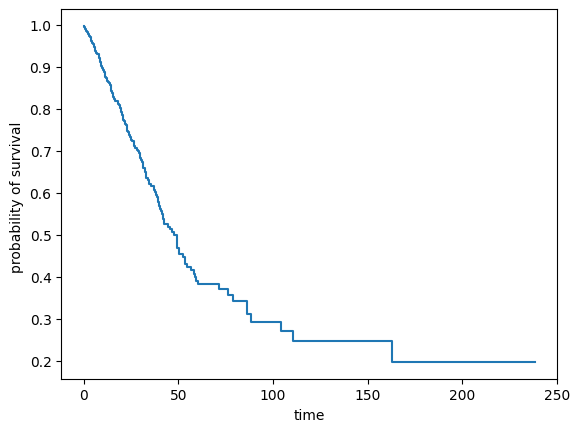

In [ ]:
from sksurv.nonparametric import kaplan_meier_estimator

time, survival_prob = kaplan_meier_estimator(df_y["Overall patient survival status."], df_y["Overall survival in months since initial diagonosis."])
plt.step(time, survival_prob, where="post")
plt.ylabel("probability of survival ")
plt.xlabel("time")
     

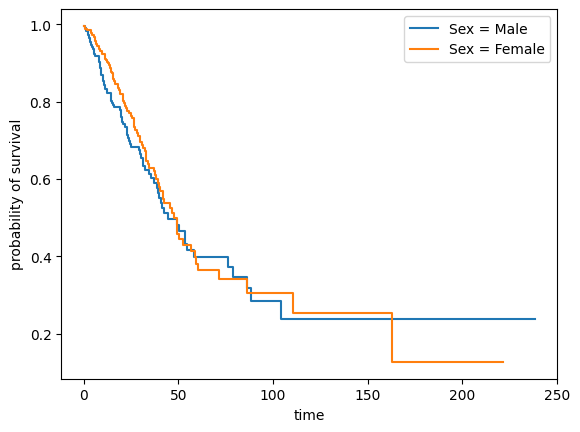

In [ ]:
for sex in ("Male", "Female"):
    mask_sex = df_patient["Sex"] == sex
    time_sex, survival_prob_sex = kaplan_meier_estimator(
        df_y["Overall patient survival status."][mask_sex],
        df_y["Overall survival in months since initial diagonosis."][mask_sex])

    plt.step(time_sex, survival_prob_sex, where="post",
             label="Sex = %s" % sex)

plt.ylabel("probability of survival")
plt.xlabel("time")
plt.legend(loc="best")

In [ ]:
df_x['Age_binary'] = df_x['Age at which a condition or disease was first diagnosed.'].apply(lambda x: '>=65' if x>=patient_data['Age at which a condition or disease was first diagnosed.'].median() else '<65')

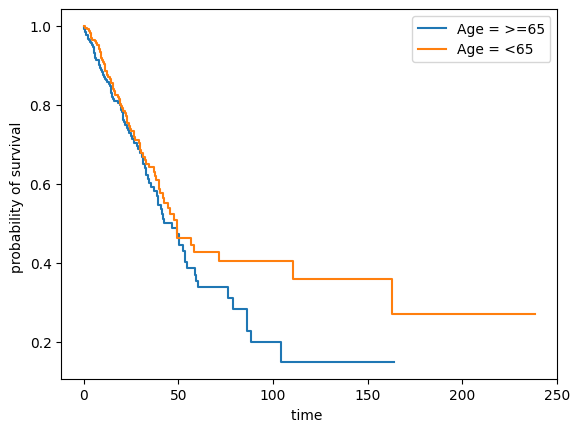

In [ ]:
for age in (">=65", "<65"):
    mask_age = df_x["Age_binary"] == age
    time_age, survival_prob_age = kaplan_meier_estimator(
        df_y["Overall patient survival status."][mask_age],
        df_y["Overall survival in months since initial diagonosis."][mask_age])

    plt.step(time_age, survival_prob_age, where="post",
             label="Age = %s" % age)

plt.ylabel("probability of survival ")
plt.xlabel("time ")
plt.legend(loc="best")

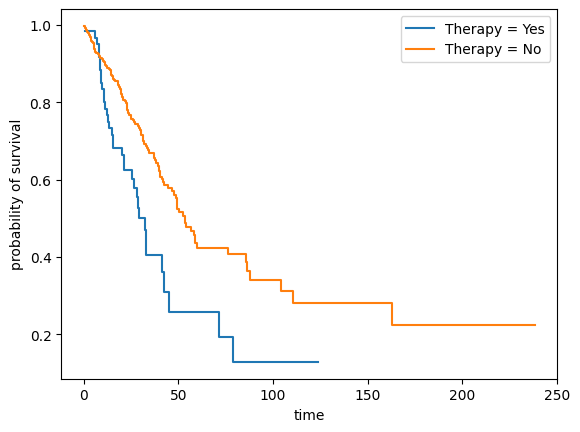

In [ ]:
for therapy in ("Yes", "No"):
    mask_therapy = df_patient["Radiation Therapy."] == therapy
    time_therapy, survival_prob_therapy = kaplan_meier_estimator(
        df_y["Overall patient survival status."][mask_therapy],
        df_y["Overall survival in months since initial diagonosis."][mask_therapy])

    plt.step(time_therapy, survival_prob_therapy, where="post",
             label="Therapy = %s" % therapy)

plt.ylabel("probability of survival")
plt.xlabel("time")
plt.legend(loc="best")

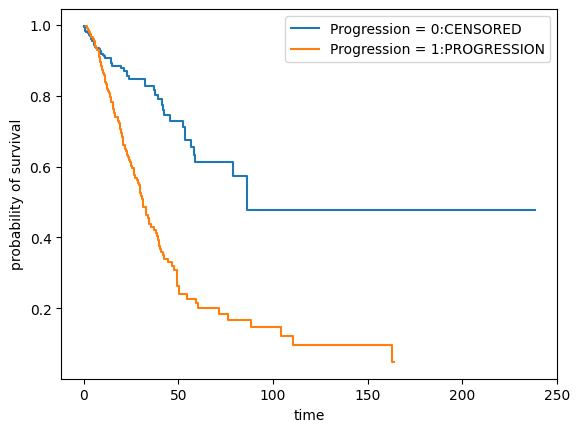

In [ ]:
for progression in ("0:CENSORED", "1:PROGRESSION"):
    mask_progression = df_patient["Progression Free Status"] == progression
    time_progression, survival_prob_progression = kaplan_meier_estimator(
        df_y["Overall patient survival status."][mask_progression],
        df_y["Overall survival in months since initial diagonosis."][mask_progression])

    plt.step(time_progression, survival_prob_progression, where="post",
             label="Progression = %s" % progression)

plt.ylabel("probability of survival")
plt.xlabel("time")
plt.legend(loc="best")

## Cox's Proportional Hazard's Model

In [157]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
sc.settings.verbosity = 3            
sc.settings.set_figure_params(dpi=80)
%matplotlib inline

In [198]:
input_file = 'data_mrna_seq_v2_rsem.txt'
mrna_data = pd.read_table(input_file, sep='\t')
mrna_data

,Hugo_Symbol,Entrez_Gene_Id,TCGA-05-4244-01,TCGA-05-4249-01,TCGA-05-4250-01,TCGA-05-4382-01,TCGA-05-4384-01,TCGA-05-4389-01,TCGA-05-4390-01,TCGA-05-4395-01,...,TCGA-NJ-A4YG-01,TCGA-NJ-A4YI-01,TCGA-NJ-A4YP-01,TCGA-NJ-A4YQ-01,TCGA-NJ-A55A-01,TCGA-NJ-A55O-01,TCGA-NJ-A55R-01,TCGA-NJ-A7XG-01,TCGA-O1-A52J-01,TCGA-S2-AA1A-01
0,NaN,100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,NaN,100133144,10.0113,7.1957,7.2453,11.3311,3.2254,4.0000,7.1084,3.4360,...,11.7148,3.6657,2.3298,16.3214,20.3514,15.5193,8.4195,42.9857,14.0861,20.5338
2,UBE2Q2P2,100134869,11.2820,12.4436,6.0184,7.5740,3.4942,13.7852,7.5810,12.1335,...,11.9573,9.7617,8.3410,7.5330,17.2393,22.9872,10.3226,81.1128,24.1914,8.9500
3,HMGB1P1,10357,49.5994,90.5117,49.5366,82.8303,72.5351,66.3658,109.1810,57.0596,...,163.5740,130.7490,101.7400,82.4231,100.4200,100.1870,74.7210,85.3715,61.1388,76.9265
4,NaN,10431,848.9400,924.0160,1140.6800,807.1730,562.0040,1342.6200,1148.3300,955.9140,...,919.1690,403.4910,918.9530,995.6060,536.7600,873.9790,766.7450,677.7330,1137.3200,565.4330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20526,ZYG11A,440590,0.6981,20.2833,26.5274,64.8514,7.9414,71.8121,7.6641,14.2273,...,15.0115,27.5260,1.2703,73.4463,3.4968,17.5029,52.6221,10.0744,0.4785,6.5520
20527,ZYG11B,79699,1088.0500,787.5060,475.1720,908.1590,778.8640,534.8990,618.2340,264.4130,...,666.2820,825.7800,758.6380,729.4410,675.7580,726.3710,757.8540,531.6540,782.2970,623.0910
20528,ZYX,7791,2837.9400,2351.2500,5437.4500,6770.1500,3341.4800,2565.4400,5256.2700,4949.2200,...,3745.9600,4719.0300,4019.0500,4187.0700,4305.4500,4185.5300,3077.7900,1995.1900,4483.2500,5346.3900
20529,ZZEF1,23140,871.2800,1138.1200,1170.5200,1169.2400,1737.3200,679.1950,780.4570,467.3540,...,641.4550,936.5560,906.5040,1325.8000,1591.9200,1333.7200,1989.3100,1424.1600,1520.5700,1582.9500


In [199]:
mrna_data = mrna_data.set_index("Entrez_Gene_Id").drop("Hugo_Symbol",axis=1).transpose()
mrna_data.rename(columns={"Entrez_Gene_Id": "Sample"}, inplace=True)
mrna_data.head()

Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,317712,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
TCGA-05-4244-01,0.0,10.0113,11.2820,49.5994,848.940,0.0,345.2310,1.0472,0.0000,0.0,...,221.164,517.672,39.7940,292.521,959.246,0.6981,1088.050,2837.94,871.28,575.268
TCGA-05-4249-01,0.0,7.1957,12.4436,90.5117,924.016,0.0,145.2020,1.6098,0.0000,0.0,...,198.589,287.507,62.1376,493.560,1179.330,20.2833,787.506,2351.25,1138.12,690.275
TCGA-05-4250-01,0.0,7.2453,6.0184,49.5366,1140.680,0.0,51.7284,0.0000,0.0000,0.0,...,520.899,1046.840,60.0182,365.415,843.903,26.5274,475.172,5437.45,1170.52,532.869
TCGA-05-4382-01,0.0,11.3311,7.5740,82.8303,807.173,0.0,240.0220,0.4786,0.2393,0.0,...,429.630,753.090,40.4424,346.752,946.687,64.8514,908.159,6770.15,1169.24,663.830
TCGA-05-4384-01,0.0,3.2254,3.4942,72.5351,562.004,0.0,274.2820,0.6109,0.0000,0.0,...,258.302,153.940,80.0244,563.225,1320.710,7.9414,778.864,3341.48,1737.32,723.274


In [200]:
same_value_cols = mrna_data.columns[mrna_data.nunique() == 1]
print("Columns with the same value throughout the DataFrame:", list(same_value_cols))
print(same_value_cols)

Columns with the same value throughout the DataFrame: [317712, 404770, 728045, 100131137, 143501, 9085, 253175, 286828, 653282, 267012, 57135, 140596, 245909, 245911, 245913, 245915, 245927, 245928, 245930, 245934, 245939, 245940, 613211, 22947, 100036563, 100036564, 100036565, 100036566, 100036567, 337969, 337971, 337974, 337975, 337985, 337979, 337963, 100131902, 337966, 337967, 353143, 151300, 653545, 339291, 129521, 126541, 343406, 128367, 126370, 391190, 391194, 343563, 134083, 219429, 119749, 79317, 81300, 256148, 219431, 390113, 401667, 283111, 219965, 390142, 219436, 219438, 10798, 219437, 390167, 219479, 390155, 390321, 403282, 254783, 128366, 219952, 391112, 26333, 390152, 81168, 390157, 219453, 219957, 140464, 30814, 285877, 401940, 122183, 729233, 729246, 493901, 26829, 6086, 6090, 645922, 100169959, 100126799, 100169951, 100169956, 100170218, 100170226, 100170227, 100170220, 100170228, 100170221, 100170222, 100124540, 677816, 100124538, 26771, 692227, 692229, 100113382, 33

In [201]:
mrna_data = mrna_data.drop(same_value_cols, axis = 1)
mrna_data.head()

Entrez_Gene_Id,100130426,100133144,100134869,10357,10431,136542,155060,26823,280660,340602,...,55055,11130,7789,158586,79364,440590,79699,7791,23140,26009
TCGA-05-4244-01,0.0,10.0113,11.2820,49.5994,848.940,0.0,345.2310,1.0472,0.0000,0.0000,...,221.164,517.672,39.7940,292.521,959.246,0.6981,1088.050,2837.94,871.28,575.268
TCGA-05-4249-01,0.0,7.1957,12.4436,90.5117,924.016,0.0,145.2020,1.6098,0.0000,0.0000,...,198.589,287.507,62.1376,493.560,1179.330,20.2833,787.506,2351.25,1138.12,690.275
TCGA-05-4250-01,0.0,7.2453,6.0184,49.5366,1140.680,0.0,51.7284,0.0000,0.0000,0.0000,...,520.899,1046.840,60.0182,365.415,843.903,26.5274,475.172,5437.45,1170.52,532.869
TCGA-05-4382-01,0.0,11.3311,7.5740,82.8303,807.173,0.0,240.0220,0.4786,0.2393,7.6577,...,429.630,753.090,40.4424,346.752,946.687,64.8514,908.159,6770.15,1169.24,663.830
TCGA-05-4384-01,0.0,3.2254,3.4942,72.5351,562.004,0.0,274.2820,0.6109,0.0000,0.0000,...,258.302,153.940,80.0244,563.225,1320.710,7.9414,778.864,3341.48,1737.32,723.274


normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.9/dist-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.9/dist-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


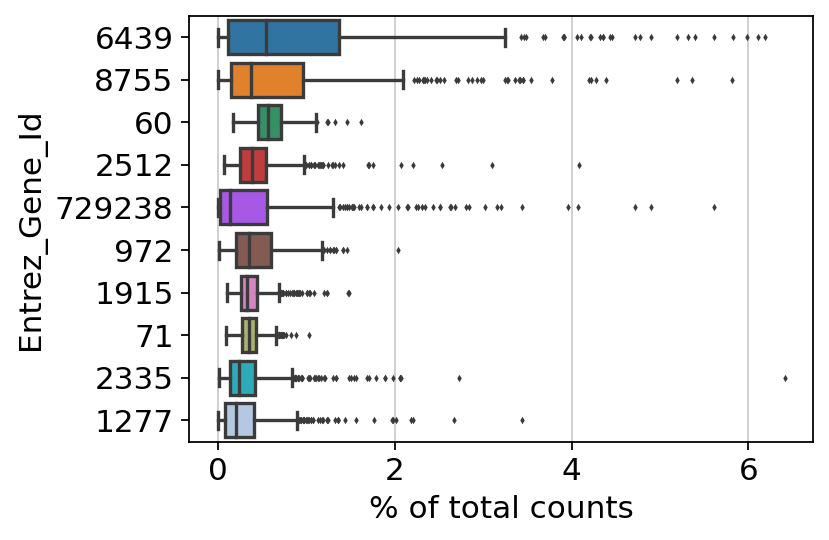

In [202]:
top_data = sc.AnnData(mrna_data)
sc.pl.highest_expr_genes(top_data, n_top=10)

In [203]:
# Select top 10 genes
gene_data= mrna_data.loc[:, [6439, 8755, 60, 2512, 729238, 972, 1915, 71, 2355, 1277]]
gene_data.dtypes

Entrez_Gene_Id
6439      float64
8755      float64
60        float64
2512      float64
729238    float64
972       float64
1915      float64
71        float64
2355      float64
1277      float64
dtype: object

In [204]:
gene_data = gene_data.add_prefix('gene_')
gene_data = gene_data.reset_index(drop=True)
gene_data.head()

Entrez_Gene_Id,gene_6439,gene_8755,gene_60,gene_2512,gene_729238,gene_972,gene_1915,gene_71,gene_2355,gene_1277
0,283433.000,8126.97,137304.0,72733.7,84761.000,75449.9,148317.0,55303.3,5959.330,51421.9
1,112463.000,84181.00,103525.0,41532.1,81744.500,82297.3,159088.0,84527.8,886.991,23076.6
2,31106.400,17526.00,168009.0,52019.6,41108.800,65692.1,86316.5,175592.0,1870.510,66134.8
3,203.887,209767.00,185012.0,158627.0,151.719,98069.2,66471.5,74542.0,1895.290,62325.6
4,415841.000,25029.00,85774.0,93593.2,115161.000,48861.3,75301.2,37571.2,3998.170,9033.6


In [205]:
patient_gene = pd.concat([patient_data, gene_data], axis=1)
patient_gene

,Age at which a condition or disease was first diagnosed.,Overall survival in months since initial diagonosis.,The time period (months) usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.,Progress Free Survival (Months),Overall patient survival status.,Sex,Radiation Therapy.,Progression Free Status,gene_6439,gene_8755,gene_60,gene_2512,gene_729238,gene_972,gene_1915,gene_71,gene_2355,gene_1277
3,70.0,0.000000,0.000000,0.000000,0.0,1.0,NaN,0.0,203.887,209767.0,185012.0,158627.0,151.7190,98069.2,66471.5,74542.0,1895.290,62325.6
4,67.0,50.070684,50.070684,50.070684,0.0,1.0,0.0,0.0,415841.000,25029.0,85774.0,93593.2,115161.0000,48861.3,75301.2,37571.2,3998.170,9033.6
5,79.0,3.978039,3.978039,3.978039,1.0,0.0,NaN,0.0,69450.300,52120.5,95672.8,343450.0,2797.3200,86567.8,97808.7,70755.4,1102.010,13618.1
6,68.0,19.955946,19.955946,10.980702,0.0,1.0,1.0,1.0,281563.000,121196.0,138901.0,54948.1,10844.6000,18188.7,59186.3,93085.7,995.050,52814.3
7,66.0,14.005326,14.005326,6.016372,0.0,1.0,1.0,1.0,2273.150,20786.6,99652.6,66575.5,316.4900,46477.9,144792.0,88108.1,3990.090,14464.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,462567.000,39585.1,86419.0,54381.8,135944.0000,50145.2,91113.0,51443.8,2715.770,26691.8
332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,846388.000,83901.3,80976.6,122404.0,595.5340,25321.8,56504.0,64082.2,1070.860,13404.5
366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186200.000,326748.0,102838.0,35850.4,46805.1000,41003.2,72225.5,53909.4,992.624,85062.2
367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2328.720,82732.8,77857.0,209145.0,71.2184,34105.1,42148.9,54377.9,2247.790,93673.6


In [206]:
# Remove duplicate columns
patient_gene = patient_gene.loc[:, ~patient_gene.columns.duplicated()]

# Remove rows with missing values
patient_gene = patient_gene.dropna(axis=0)


In [207]:
patient_gene = patient_gene.astype('int')
patient_gene.dtypes

Age at which a condition or disease was first diagnosed.                                                                        int64
Overall survival in months since initial diagonosis.                                                                            int64
The time period (months) usually begins at the time of diagnosis or at the start of treatment and ends at the time of death.    int64
Progress Free Survival (Months)                                                                                                 int64
Overall patient survival status.                                                                                                int64
Sex                                                                                                                             int64
Radiation Therapy.                                                                                                              int64
Progression Free Status                                       

In [211]:
from sksurv.util import Surv
data_y= Surv().from_dataframe("Overall patient survival status.", "Overall survival in months since initial diagonosis.", patient_gene)
data_x= patient_gene.drop(["Overall patient survival status.", "Overall survival in months since initial diagonosis."], axis=1)
data_y

array([(False,  50.), (False,  19.), (False,  14.), (False,  45.),
       (False,  37.), (False,  47.), ( True,   8.), (False,  20.),
       ( True,   2.), (False,  14.), (False,  29.), (False,  30.),
       (False,  26.), (False,  25.), (False,  28.), (False,  22.),
       (False,  97.), (False, 120.), ( True,  37.), ( True,  49.),
       ( True,  11.), ( True,  44.), (False,  14.), ( True,  26.),
       (False,   4.), (False,  43.), (False,  46.), (False,  44.),
       (False,  44.), (False,  42.), (False,  42.), ( True,   3.),
       ( True,  25.), (False,  37.), (False,  38.), (False,  38.),
       (False,  34.), ( True,  33.), ( True,  26.), (False,  33.),
       (False,  28.), (False,  28.), (False,  23.), (False,  19.),
       (False,  23.), (False,  23.), (False,  21.), (False,  23.),
       (False,  86.), ( True,  32.), (False,  61.), ( True,  16.),
       (False,  22.), (False,  19.), ( True,  18.), (False,   7.),
       (False,  36.), ( True,  18.), (False,  28.), (False,  2

In [212]:
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis

from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

set_config(display="text")

In [233]:
cox_net = CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01)
cox_net.fit(data_x, data_y)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9)

In [234]:
cox_net.score(data_x, data_y)

0.507117980527239

In [235]:
import warnings
from sklearn.exceptions import FitFailedWarning

cox_net_pipeline = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100)
)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FitFailedWarning)
cox_net_pipeline.fit(data_x, data_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9,
                                        max_iter=100))])

In [237]:
est_alpha = cox_net_pipeline.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=0)
gcv = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(l1_ratio=0.9)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=1).fit(data_x, data_y)

cv_results = pd.DataFrame(gcv.cv_results_)

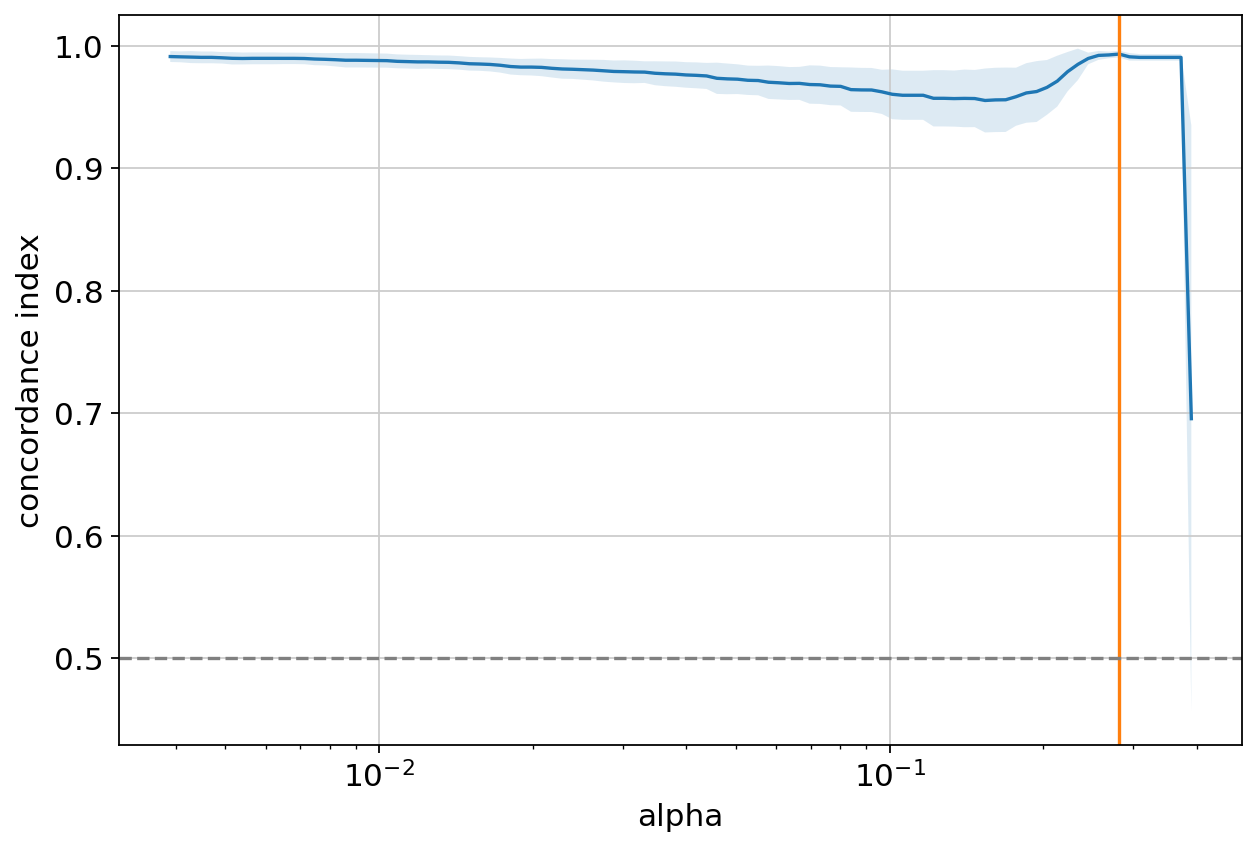

In [238]:
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])
mean = cv_results.mean_test_score
std = cv_results.std_test_score

fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(alphas, mean)
ax.fill_between(alphas, mean - std, mean + std, alpha=.15)
ax.set_xscale("log")
ax.set_ylabel("concordance index")
ax.set_xlabel("alpha")
ax.axvline(gcv.best_params_["coxnetsurvivalanalysis__alphas"][0], c="C1")
ax.axhline(0.5, color="grey", linestyle="--")
ax.grid(True)

Number of non-zero coefficients: 2


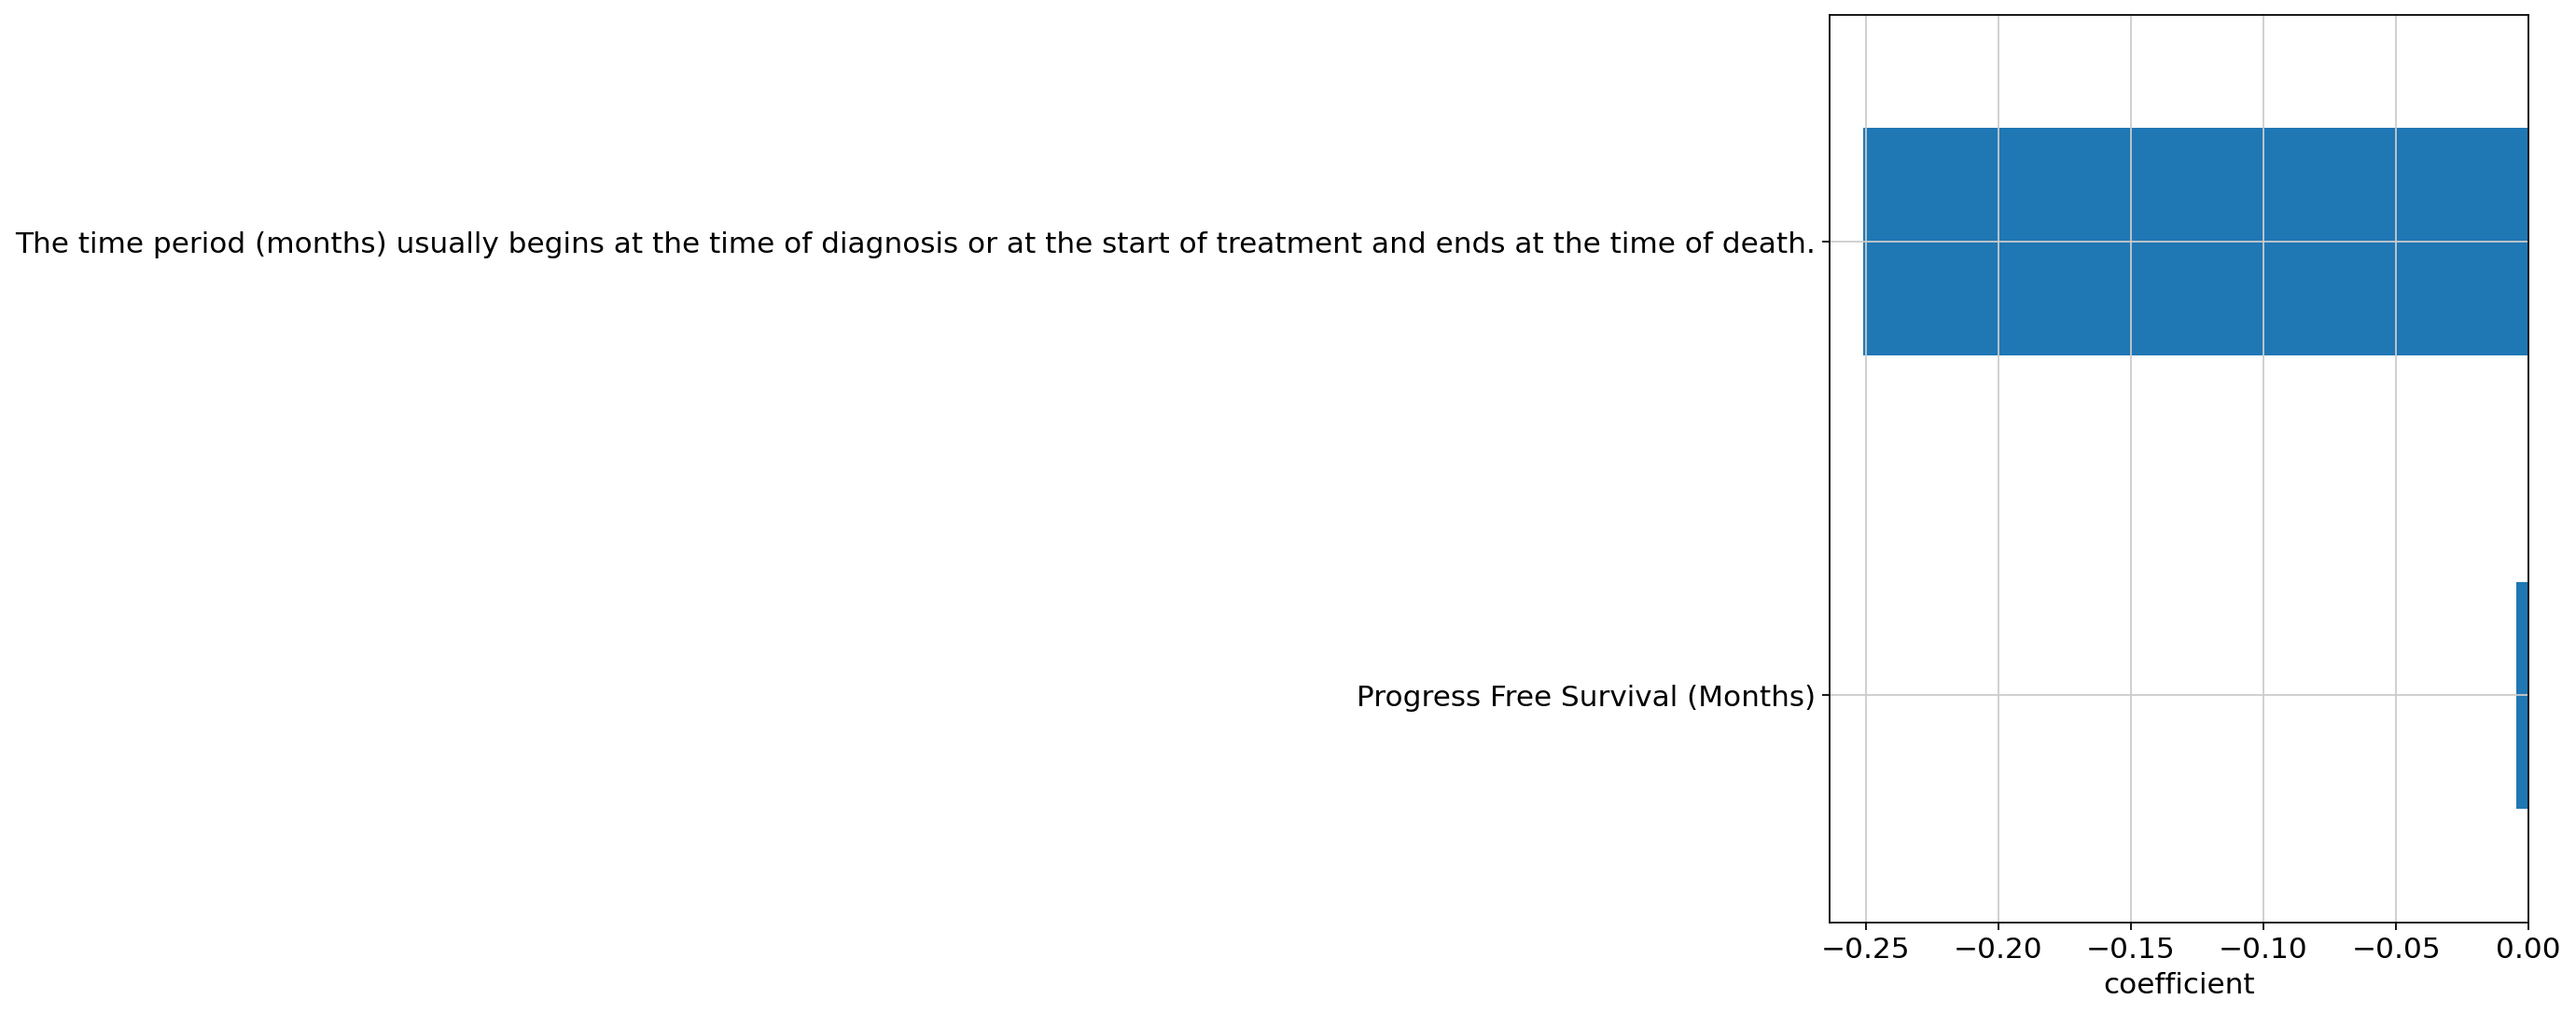

In [239]:
coxnet_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(
    coxnet_model.coef_,
    index=data_x.columns,
    columns=["coefficient"]
)

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print("Number of non-zero coefficients: {}".format(non_zero))

non_zero_coefs = best_coefs.query("coefficient != 0")
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("coefficient")
ax.grid(True)